# 차원축소_주성분분석(PCA)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
# 한글 폰트 적용
matplotlib.rc('font', family = 'Nanumgothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('./datasets/유방암.csv',encoding='CP949')
df_x=df.drop('diagnosis',axis=1)
df_y=df['diagnosis']
df_y.head()

0    음성
1    양성
2    음성
3    양성
4    양성
Name: diagnosis, dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

결측치가 없고, 데이터는 총 320개, 설명변수의 개수는 30개이다.  
Target Variable은 명목형 변수이다.(양성,음성 두개의 범주를 가진다.)

설명변수의 개수가 30개이기 때문에 그래프로 판단하기 어려워 기술통계량을 사용하겠다.

In [4]:
(30-df_x.corr().round(3)[df_x.corr().round(3)>0.7].isnull().sum()).sort_values(ascending=False)

mean_perimeter             12
worst_perimeter            12
mean_concave_points        11
mean_area                  10
worst_area                 10
worst_radius               10
mean_radius                 9
worst_concave_points        9
mean_concavity              9
radius_error                9
area_error                  9
mean_compactness            7
worst_concavity             7
perimeter_error             7
worst_compactness           6
concavity_error             5
compactness_error           4
worst_fractal_dimension     4
fractal_dimension_error     3
concave_points_error        2
mean_texture                2
worst_texture               2
worst_smoothness            2
mean_fractal_dimension      2
mean_symmetry               2
mean_smoothness             2
worst_symmetry              2
symmetry_error              1
smoothness_error            1
texture_error               1
dtype: int64

위는 다른 변수들과의 상관계수가 0.7이상으로 나타난 변수를 순서대로 나타낸 것이다.
mean_perimeter,worst_perimeter,mean_concave_points,worst_area,mean_area,worst_radius 변수와 다른 변수와의 상관관계가 높게 나타난 것을 확인할 수 있다.  

In [5]:
df_x.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


변수들의 평균이 크게 차이가 나는 것을 확인할 수 있다. scaling할 필요가 있어 보인다.

In [8]:
x_cols=df_x.columns

#Scale 변환
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_x)

#변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(2)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-0.16 -0.88 -0.17 -0.23 -0.74 -0.48 -0.55 -0.63 -1.   -0.39 -0.69 -1.74
  -0.65 -0.52 -0.5  -0.51 -0.67 -0.86 -0.59 -0.46 -0.15 -1.16 -0.15 -0.22
   0.49  0.14 -0.09 -0.3   0.53  0.51]
 [-1.31 -2.56 -1.33 -1.15 -0.24 -1.15 -1.14 -1.2  -1.77  0.18 -0.99 -1.65
  -1.   -0.78  0.33 -1.02 -1.07 -1.36 -0.89 -0.8  -1.34 -2.52 -1.38 -1.12
   0.25 -1.05 -1.16 -1.48 -1.39 -0.51]
 [ 0.7  -0.42  0.6   0.6  -0.95 -0.68 -0.48 -0.21 -0.9  -1.17 -0.73 -1.5
  -0.72 -0.47 -1.42 -1.06 -0.94 -1.13 -1.1  -1.27  0.53 -0.14  0.45  0.43
  -0.61 -0.37  0.    0.17  0.22 -0.89]
 [-0.21 -1.3  -0.26 -0.31 -1.29 -0.66 -0.79 -0.83 -0.66 -0.83 -0.77 -1.59
  -0.71 -0.57 -1.28 -0.59 -0.56 -0.84 -1.01 -0.68 -0.26 -1.49 -0.31 -0.35
  -1.34 -0.17 -0.18 -0.46 -0.52 -0.22]
 [-0.75 -1.74 -0.82 -0.75 -2.1  -1.51 -1.18 -1.33 -1.93 -0.96 -1.05 -1.52
  -1.01 -0.76 -0.76 -0.83 -0.83 -1.27 -0.48 -0.82 -0.95 -1.93 -1.   -0.87
  -1.78 -1.11 -1.09 -1.37 -1.07 -0.9 ]]
Shape :
 (320, 30)


In [9]:
df_scaled=pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,...,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.144,-2.561,-2.137,-1.629,-3.284,-1.690,-1.442,-1.607,-2.164,-1.772,...,-1.906,-2.517,-1.914,-1.422,-2.234,-1.477,-1.648,-2.165,-2.146,-1.602
25%,-0.711,-0.691,-0.706,-0.725,-0.641,-0.737,-0.819,-0.899,-0.724,-0.728,...,-0.751,-0.654,-0.771,-0.750,-0.645,-0.734,-0.794,-0.813,-0.670,-0.683
50%,-0.156,-0.026,-0.114,-0.242,-0.055,-0.139,-0.133,-0.041,-0.077,-0.172,...,-0.157,-0.057,-0.122,-0.257,0.016,-0.182,-0.062,0.107,-0.134,-0.225
75%,0.751,0.525,0.717,0.684,0.611,0.567,0.560,0.595,0.580,0.561,...,0.749,0.614,0.714,0.633,0.581,0.554,0.611,0.768,0.332,0.528
max,3.316,4.574,3.313,4.327,4.501,3.889,3.597,3.221,4.272,4.842,...,3.382,3.694,3.564,4.876,3.648,4.283,3.816,2.166,5.179,6.004


평균이 0, 표준편차가 1로 스케일된 것을 확인할 수 있다.

In [10]:
#주성분 분석: 주성분1~주성분6
pca=PCA(n_components=8)
nd_pca=pca.fit_transform(df_scaled)
print("PCA Data:\n {}".format(nd_pca[:5]))

print("Shape: \n {}".format(nd_pca.shape))

PCA Data:
 [[-2.00389702 -0.25805811 -1.84890296 -1.31467512  0.62472622  0.78945168
   0.13210868 -1.01407999]
 [-5.84906746  0.21164764 -0.16808736 -2.95641861  1.83054388 -0.40516509
   0.32301073 -0.52661021]
 [-1.54904826 -2.92566391 -2.44246291 -0.46586769  0.09042314  1.03234868
  -0.57968881 -0.05571789]
 [-3.11249085 -1.32153438 -1.21958526 -1.44380449  0.69955798  1.98733066
   0.29057355  0.05944204]
 [-5.82479946 -1.67892363  0.05729344 -1.50169681  0.84564816  2.02590247
   0.24805198 -0.42078024]]
Shape: 
 (320, 8)


In [11]:
df_pca=pd.DataFrame(nd_pca,columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8'])
df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_symmetry,worst_fractal_dimension,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,0.525611,0.511081,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,0.789452,0.132109,-1.014080
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.387506,-0.507149,-5.849067,0.211648,-0.168087,-2.956419,1.830544,-0.405165,0.323011,-0.526610
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.223844,-0.886803,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,1.032349,-0.579689,-0.055718
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.524077,-0.220788,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,1.987331,0.290574,0.059442
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-1.071301,-0.898278,-5.824799,-1.678924,0.057293,-1.501697,0.845648,2.025902,0.248052,-0.420780


In [14]:
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo']=[l for l in range(1,9)]
df_pca_stat['EigenValues']=pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,13.125,0.436,0.436
1,2,5.982,0.199,0.635
2,3,3.116,0.104,0.738
3,4,1.950,0.065,0.803
4,5,1.319,0.044,0.847
5,6,1.252,0.042,0.889
6,7,0.749,0.025,0.914
7,8,0.534,0.018,0.931


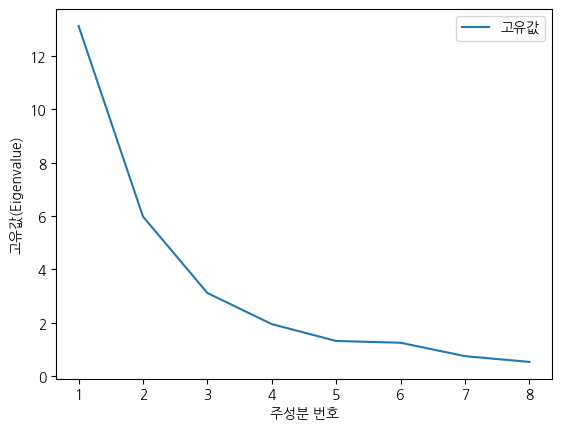

In [20]:
#scree plot에서 elbow 지점 선택
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValues'],label="고유값")

plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

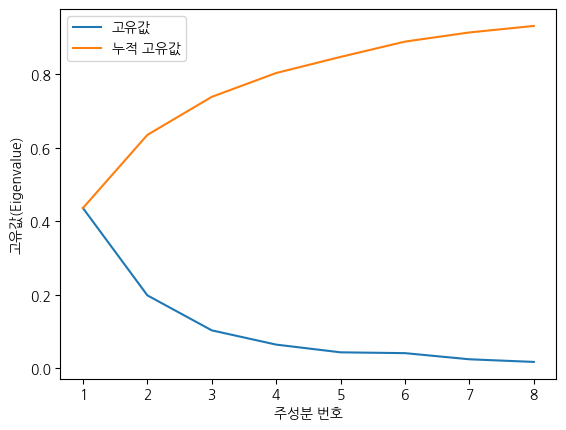

In [21]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat['EigenValueRatio'],label="고유값")
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'],label="누적 고유값")

plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

EigenValue가 1을 넘으면서 고유값 누적비율이 0.8이상이 되도록 하기 위해 주성분 6개를 사용한다.

In [22]:
x_cols=pd.DataFrame({"Feature":df_x.columns})

df_eigenvector=pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1,
                         columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8'])],axis=1)
df_eigenvector.round(2)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8
0,mean_radius,-0.21,0.24,0.03,0.03,-0.01,-0.07,0.16,-0.10
1,mean_texture,-0.11,0.05,0.04,-0.60,0.04,0.10,-0.03,0.14
2,mean_perimeter,-0.22,0.22,0.02,0.03,-0.01,-0.07,0.15,-0.11
3,mean_area,-0.21,0.24,-0.00,0.04,-0.01,-0.03,0.08,-0.05
4,mean_smoothness,-0.15,-0.19,0.06,0.20,-0.04,0.47,0.07,-0.20
5,mean_compactness,-0.24,-0.16,0.05,0.05,-0.02,-0.04,-0.02,-0.14
6,mean_concavity,-0.26,-0.05,0.00,0.05,-0.06,-0.02,0.11,-0.06
7,mean_concave_points,-0.26,0.04,0.04,0.09,-0.01,0.07,0.15,-0.19
8,mean_symmetry,-0.15,-0.20,0.05,0.14,0.43,0.06,0.05,-0.22
9,mean_fractal_dimension,-0.08,-0.35,-0.00,0.08,-0.06,0.10,-0.29,-0.18


In [23]:
df_pca

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8
0,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,0.789452,0.132109,-1.014080
1,-5.849067,0.211648,-0.168087,-2.956419,1.830544,-0.405165,0.323011,-0.526610
2,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,1.032349,-0.579689,-0.055718
3,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,1.987331,0.290574,0.059442
4,-5.824799,-1.678924,0.057293,-1.501697,0.845648,2.025902,0.248052,-0.420780
...,...,...,...,...,...,...,...,...
315,3.203038,-0.265636,4.051026,1.690832,0.115799,-0.134136,-2.134139,1.577557
316,3.421096,0.860183,2.742605,2.127877,0.422649,-1.085280,0.273520,3.030544
317,11.009894,1.856835,6.817009,-1.306914,-0.595707,-2.643071,-1.702487,-0.314767
318,6.626788,2.463363,5.945138,1.983595,-1.872139,2.265035,1.506391,3.887359


In [24]:
groups = df_pca.join(df['diagnosis'])

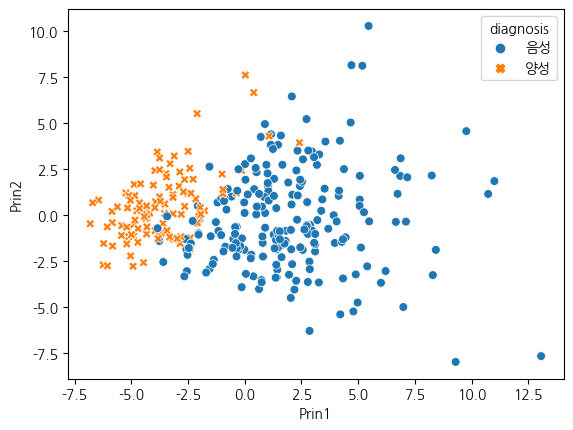

In [25]:
sns.scatterplot(x='Prin1',y='Prin2',hue='diagnosis', style='diagnosis', s=40, data=groups)
plt.show()

Prin1의 eigen value는 13.125로 상당히 크게 나타난 것을 확인할 수 있다. 또한 전체 변동중 43.6%를 설명한다.  
위의 그림을 통해 확인할 수 있는데, Prin1축을 기준으로 변동이 큰 것을 확인할 수 있다.  
Prin1축을 기준으로 -2.5보다 작으면 양성, -2.5보다 크면 음성으로 나타나는 것을 확인할 수 있다.  
Prin2의 eigen value는 5.982로 Prin1의 eigen value보다는 작지만, 전체 변동 중 약 20%를 설명한다.
Prin2에는 양성과 음성을 구분할 명확한 기준이 보이지는 않지만, Prin2의 주성분 점수가 -2.5보다 작을 경우, 양성의 case는 존재하지 않는 것을 확인할 수 있다.

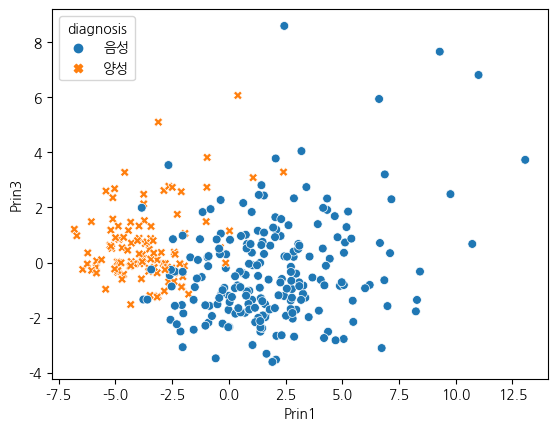

In [26]:
sns.scatterplot(x='Prin1',y='Prin3',hue='diagnosis', style='diagnosis', s=40, data=groups)
plt.show()

Prin3의 eigenvalue는 3.116으로 1보다 크기 때문에 주성분으로 채택하지만, 전체 변동 중 10%를 설명한다.  
Prin1축을 기준으로 -2.5보다 작으면 양성, -2.5보다 크면 음성으로 나타나는 것을 확인할 수 있다.  
Prin3은 전체 변동의 10%를 설명하기 때문에, Prin3을 기준으로 했을 때, 양성과 음성의 분리가 명확하지는 않다.  

In [27]:
df_eigenvector['Prin1'].sort_values()

6    -0.260686
7    -0.260471
27   -0.247169
5    -0.239702
22   -0.232550
26   -0.225037
2    -0.224593
20   -0.221231
23   -0.214672
0    -0.214365
3    -0.213354
12   -0.208266
10   -0.202083
25   -0.198649
13   -0.194619
17   -0.185920
16   -0.185114
15   -0.179327
4    -0.151303
8    -0.146700
24   -0.127793
19   -0.126711
29   -0.124162
28   -0.111046
1    -0.109699
21   -0.106466
9    -0.076421
18   -0.064306
11   -0.049676
14   -0.032907
Name: Prin1, dtype: float64

index 6: mean_concavity: 세포의 평균 오목함   
index 7: mean_concave_points: 평균 오목한 점의 수    
index 27: worst_concave_points : 평균 오목한 점의 수 중 제일 큰 3개의 평균    
index 5:worst_perimeter : 평균 둘레 중 제일 큰 3개의 평균   
index 22:worst_concavity : 평균 오목함 중 제일 큰 3개의 평균     

주성분 1의 경우, 영향력이 크게 나타나고 같은 방향으로 움직이는 변수들은 대부분 세포의 오목한 정도와 수를 대변하는 변수이다.      
**따라서 주성분 1의 name을 세포의 오목함의 정도로 정하겠다.**  
실제로,유방암은 유방의 세포에서 발생하는 것으로 세포가 비정상적으로 성장 및 증식하여 응어리 또는 종양을 형성하는 질환이기 때문에, 오목한 세포의 수와 정도가 중요할 것이다.    

In [28]:
df_eigenvector['Prin2'].sort_values()

9    -0.351026
29   -0.288810
19   -0.245685
15   -0.208688
8    -0.197394
4    -0.193954
24   -0.192724
25   -0.190028
28   -0.183892
5    -0.162921
16   -0.153878
18   -0.147213
14   -0.125240
26   -0.119717
17   -0.074081
11   -0.061638
6    -0.046494
27   -0.010372
21    0.010921
7     0.039374
1     0.045617
12    0.132452
10    0.157783
13    0.187103
22    0.202417
2     0.218455
20    0.225108
23    0.234452
0     0.238471
3     0.244819
Name: Prin2, dtype: float64

index 9: mean_fractal_dimension: 세포의 평균 프랙탈 차원  
index 29: worst_fractal_dimension: 평균 프랙탈 차원 중 제일 큰 3개의 평균   
index 19: fractal_dimension_error: 프랙탈 차원의 표준오차   
 
주성분 2의 경우, 영향력이 크게 나타나고 같은 방향으로 움직이는 변수들은 대부분 세포의 프랙탈 차원과 관련된 변수이다.  
**따라서 주성분 2의 name을 프랙탈 차원으로 정하겠다.**    
2000년에 James W.Baish 등은 종양의 경계부위나 혈관 생성 부위에서 특이적인 프랙탈 차원을 관찰하고, 암의 치료 및 진단에 유용할 것으로   
발표하였으며, Kikuchi A등은 2002년에 난소암 조직의 경계부위를 연구하여 암의 진행정도에 따라 다른 프랙탈 차원이 나타난다는 연구 결과를   
보고하였다.    
이에 더하여 Ohri S등의 2004년 발표 연구에서는 암세포의 악성,양성 여부 또한 프랙탈의 차원의 차이로 구별해 낼 수 있음을 밝혀내었다.  


[출처:Fractal 차원분석을 이용한 세포형태 특성 연구,서울대학교 이건호 논문]

In [29]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8
Prin1,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,0.0
Prin5,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
Prin6,-0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,0.0
Prin7,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0
Prin8,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,1.0


주성분은 서로 독립적으로, 상관계수가 모두 0으로 나타난다.